In [2]:
from google.cloud import vision
from google.cloud.vision import types
import io
from PIL import Image, ImageDraw
from enum import Enum 
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

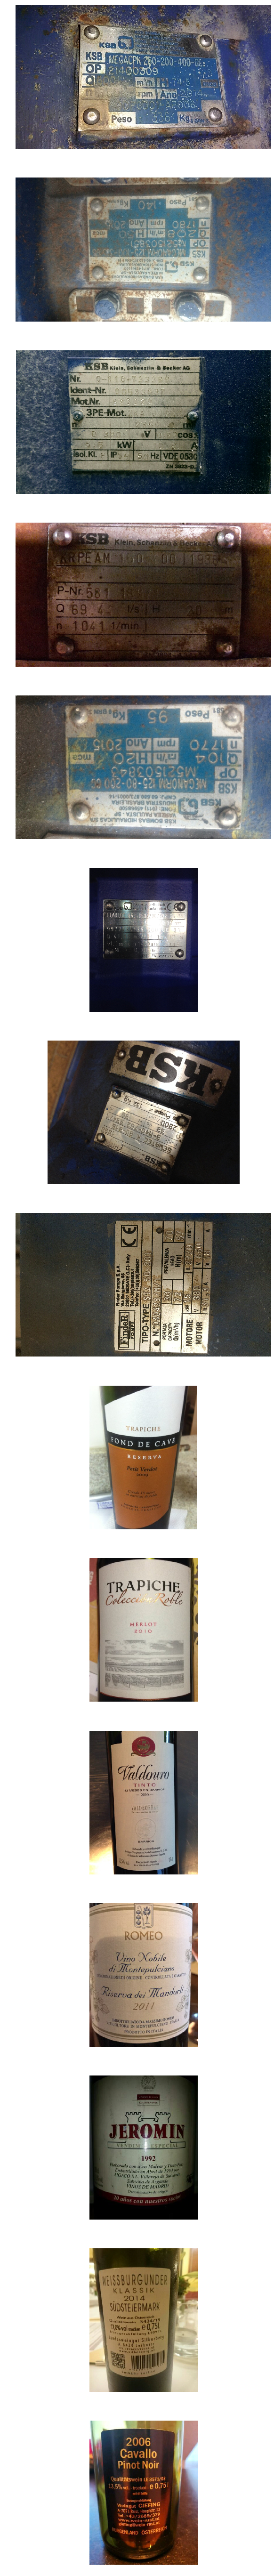

In [76]:
def showImagesHorizontally(list_of_files):
    fig = figure(figsize=(75,100))
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(number_of_files,1,i+1)
        ima = imread(list_of_files[i])
        imshow(ima,cmap='Greys_r')
        axis('off')
    
showImagesHorizontally(allfileslist)

In [3]:
fake=[]
for folder, subs, files in os.walk('ocreval/fake/'):
        for filename in files:
            fake.append(os.path.join(folder, filename))
real=[]
for folder, subs, files in os.walk('ocreval/real/'):
        for filename in files:
            real.append(os.path.join(folder, filename))

In [5]:
#Extract texts
for filepath in fake:
    outfile = os.path.splitext(filepath)[0].split('/')[-1] + ".jpg"
    image  = Image.open(filepath)
    client = vision.ImageAnnotatorClient()
    with io.open(filepath, 'rb') as image_file1:
        content = image_file1.read()
    content_image = types.Image(content=content)
    response = client.document_text_detection(image=content_image)
    document = response.full_text_annotation
    print('***************************************************************')
    print(outfile)
    print(document.text)
    #bounds = get_document_bounds(response, FeatureType.WORD)
    #draw_boxes(image, bounds, 'yellow')

***************************************************************
251_fake.jpg
S
LE
KSB
Modelo PR 40
No..) IQ Tri
66

***************************************************************
252_fake.jpg
RIYÊ PTY. LTD. Austra
2| 1651-
319 01
ПЕ Ma Nm
ne rimin
СС1
2001 M.Pos.

***************************************************************
253_fake.jpg
B D-67227 Fr
ZOC GN 050-12
114 8 119 00
000'/h 1 # 2
30 1/min1 Jahr
TOA

***************************************************************
254_fake.jpg
0 125/4025
3 002000 D
TH 20 00
905min! 20-1
1

***************************************************************
255_fake.jpg
SB Aktiengesellscha
TACHROM-B 32-2
C2
5-143-158 98
m3/h H
11on 12

***************************************************************
256_fake.jpg
Aktiengesellschen
227 Frankenthal
080 - 250 610
000 10001
H.80 0:0,-

***************************************************************
257_fake.jpg
ARZEA PAULISTA - SP
FONE (011) 4596850C
INDUSTRIA BRASILEIRA
CNPJ: 60.680.873/0047414
NORM 1

In [2]:
image_file='MyOCR/test/t7.jpg'
image  = Image.open(image_file)

# Calling the API

In [3]:
client = vision.ImageAnnotatorClient()
with io.open(image_file, 'rb') as image_file1:
        content = image_file1.read()
content_image = types.Image(content=content)
response = client.document_text_detection(image=content_image)
document = response.full_text_annotation
print(document.text)

ROMEO
Vino Nobile
di Montepulciano
DENOMINAZIONE DI ORIGINE CONTROLLATA E GARANTITA
Riserva dei Mandorli
2011
IMBOTTIGLIATO
TIGLIATO DA MASSIMO ROME
COLTORE IN MONTEPULCIAN
PRODOTTO IN ITALIA
FULCIANO ITALIA



In [5]:
print(document.text)

Cabernet 2014
SUDTIROL
ALTO ADIGE
KURTATSCH
CORTACCIA



# Plotting bounding boxes from the response.

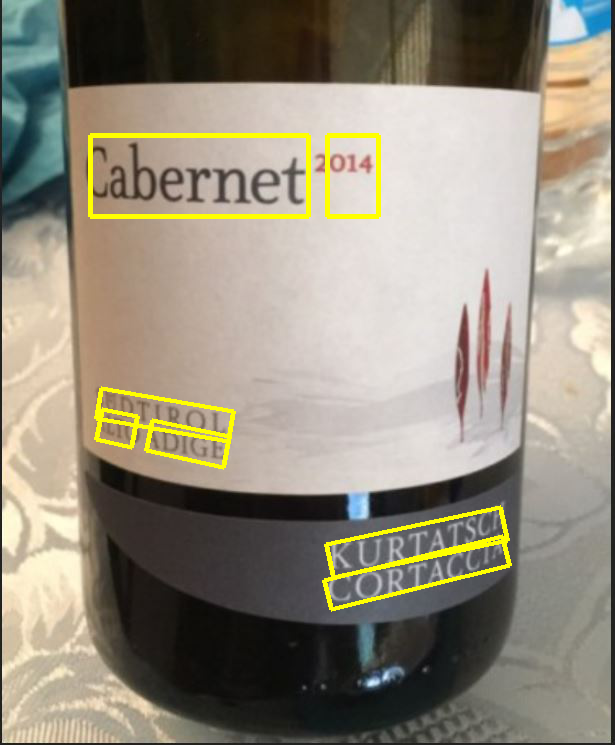

In [6]:
class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5
    
def draw_boxes(image, bounds, color,width=5):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        draw.line([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y,
            bound.vertices[0].x, bound.vertices[0].y],fill=color, width=width)
    return image

def get_document_bounds(response, feature):
    bounds=[]
    for i,page in enumerate(document.pages):
        for block in page.blocks:
            if feature==FeatureType.BLOCK:
                bounds.append(block.bounding_box)
            for paragraph in block.paragraphs:
                if feature==FeatureType.PARA:
                    bounds.append(paragraph.bounding_box)
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if (feature == FeatureType.SYMBOL):
                            bounds.append(symbol.bounding_box)
                    if (feature == FeatureType.WORD):
                        bounds.append(word.bounding_box)
    return bounds

bounds = get_document_bounds(response, FeatureType.WORD)
draw_boxes(image, bounds, 'yellow')

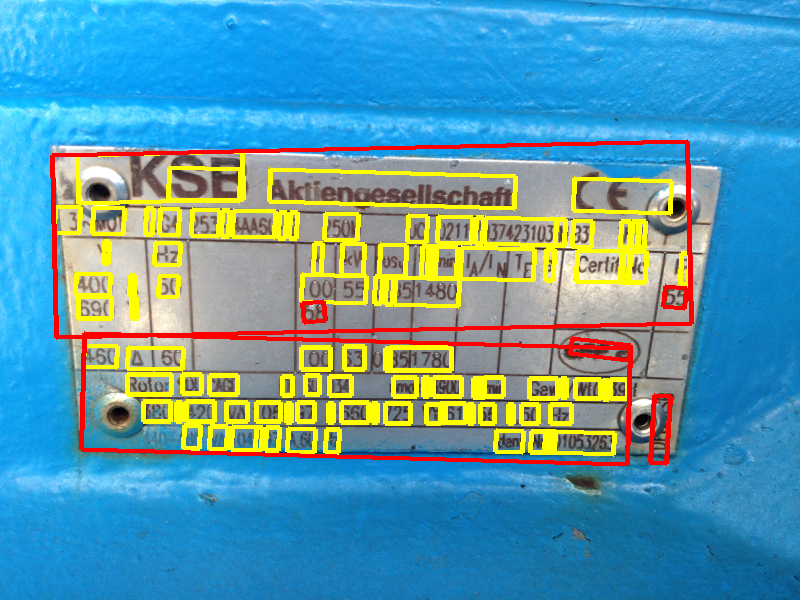

In [10]:
#FOR BLOCKS
bounds = get_document_bounds(response, FeatureType.BLOCK)
draw_boxes(image, bounds, 'red')

# Finding location of a word

In [11]:
def assemble_word(word):
    assembled_word=""
    for symbol in word.symbols:
        assembled_word+=symbol.text
    return assembled_word

def find_word_location(document,word_to_find):
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    assembled_word=assemble_word(word)
                    if(assembled_word==word_to_find):
                        return word.bounding_box
                    
vision_client = vision.ImageAnnotatorClient()

with io.open(image_file, 'rb') as image_file2:
    content = image_file2.read()

content_image = types.Image(content=content)
response = client.document_text_detection(image=content_image)
document = response.full_text_annotation

find_word_location(document,'NATIONAL')

# Finding word inside

In [12]:
def text_within(document,x1,y1,x2,y2): 
    text=""
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        min_x=min(symbol.bounding_box.vertices[0].x,symbol.bounding_box.vertices[1].x,symbol.bounding_box.vertices[2].x,symbol.bounding_box.vertices[3].x)
                        max_x=max(symbol.bounding_box.vertices[0].x,symbol.bounding_box.vertices[1].x,symbol.bounding_box.vertices[2].x,symbol.bounding_box.vertices[3].x)
                        min_y=min(symbol.bounding_box.vertices[0].y,symbol.bounding_box.vertices[1].y,symbol.bounding_box.vertices[2].y,symbol.bounding_box.vertices[3].y)
                        max_y=max(symbol.bounding_box.vertices[0].y,symbol.bounding_box.vertices[1].y,symbol.bounding_box.vertices[2].y,symbol.bounding_box.vertices[3].y)
                        if(min_x >= x1 and max_x <= x2 and min_y >= y1 and max_y <= y2):
                            text+=symbol.text
                            if(symbol.property.detected_break.type==1 or 
                               symbol.property.detected_break.type==3):
                                text+=' '
                            if(symbol.property.detected_break.type==2):
                                text+='\t'
                            if(symbol.property.detected_break.type==5):
                                text+='\n'
    return text

In [22]:
text_within(document, 786,165,1331,234)

'NATIONA'